In [50]:
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib widget


In [51]:
# Define the folder path (up one level and down two levels)
current_dir = os.getcwd()
folder_path = Path(current_dir).resolve().parents[0] / "tests" / "pySLAMMER_suite_resp"

# List all CSV files in the folder
csv_files = list(folder_path.glob("*.csv"))

# Read each CSV file into a DataFrame and store them in a list
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file, skiprows=2, header=None)
    df.columns = ["freq", "resp"]
    df["filename"] = csv_file.name.strip(".csv")  # Add a column with the filename
    dataframes.append(df)

# Optionally, combine all DataFrames into one
resp_df = pd.concat(dataframes, ignore_index=True)

resp_df = resp_df[resp_df["freq"] <= 20]
resp_df["resp"] = resp_df["resp"]/981 # Convert to g's
resp_df["period"] = 1/resp_df["freq"] # Calculate period

# Display the first few rows of the combined DataFrame
print(resp_df.head())



       freq      resp                  filename     period
0  0.050000  0.002999  Morgan_Hill_1984_CYC-285  20.000000
1  0.052649  0.003184  Morgan_Hill_1984_CYC-285  18.993835
2  0.055434  0.003382  Morgan_Hill_1984_CYC-285  18.039440
3  0.058363  0.003594  Morgan_Hill_1984_CYC-285  17.134148
4  0.061442  0.003821  Morgan_Hill_1984_CYC-285  16.275429


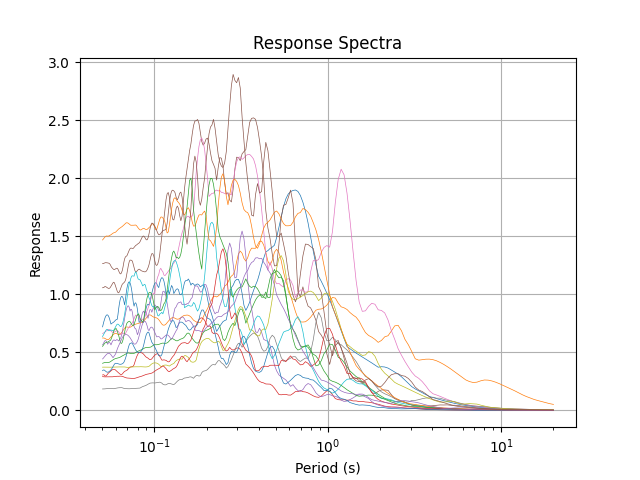

In [52]:
# Initialize the plot
fig, ax = plt.subplots()

# Group the combined DataFrame by the 'filename' column and plot each group
for filename, group in resp_df.groupby("filename"):
    if "Landers" in filename or "Nah" in filename:
        continue
    ax.plot(group["period"], group["resp"], label=filename, linewidth=0.5)  # Use filename as the label

# Add labels, legend, and grid
ax.set_xlabel("Period (s)")
ax.set_ylabel("Response")
ax.set_title("Response Spectra")
ax.set_xscale("log")
# ax.legend(loc="upper right", fontsize="small", title="Filename", title_fontsize="medium")
ax.grid(True)

# Show the plot
plt.show()
